In [1]:
%%capture
%run EOMs.ipynb

In [2]:
%matplotlib inline

# Plot functions

In [41]:
def plot(results, jobs, fig, axes, color, t1, t2, mupint, params, T_DISK, np_n=False):
    t_ind1 = 0
    t_ind2 = -1
    t_ind1 = npy.where(results.t >= t1)[0][0]
    t_ind2 = npy.where(results.t >= t2)[0][0]

    jint = 2
    tint = results.t[t_ind1:t_ind2]
    nint = results.y[0, t_ind1:t_ind2]
    npint = npy.exp(-results.t[t_ind1:t_ind2] / TMVAL)
    npint[results.t[t_ind1:t_ind2] > T_DISK] = npy.exp(-T_DISK / TMVAL)
    apint = npint ** (-2.0 / 3)
    eint = results.y[1, t_ind1:t_ind2]
    epint = float(params[ep])
    pomint = results.y[2, t_ind1:t_ind2]
    thpint = results.y[3, t_ind1:t_ind2]
    alphaint = (nint / npint) ** (2.0 / 3)
    bint = float(params[b])
    bpint = float(params[bp])
    mupint = 5e-5
    ompint = jobs[2]
    omint = jobs[3]
    aint = nint ** (-2.0 / 3)
    ncint = (jint * npint + omint) / (jint + 1)
    acint = ncint ** (-2.0 / 3)
    alpha0int = (jint / (jint + 1)) ** (2.0 / 3)
    Thint = npy.sqrt(aint / apint)
    Th0int = ((jint + 1) / (jint + ompint / npint)) ** (1.0 / 3)
    dThint = Thint - Th0int
    thint = (thpint + ompint * tint - pomint) % (2 * npy.pi)
    phiint = npy.arctan2(
        eint * npy.sin(ompint * tint - pomint),
        eint * npy.cos(ompint * tint - pomint) - npy.abs(bpint / bint) * epint,
    )
    Phiint = (
        eint**2 / 2 / npy.sqrt(alpha0int)
        - 1
        / npy.sqrt(alpha0int)
        * npy.abs(bpint / bint)
        * eint
        * epint
        * npy.cos(ompint * tint - pomint)
        + epint**2 * bpint**2 / 2 / npy.sqrt(alpha0int) / bint**2
    )
    Domint = ompint-omint
    J2int = dThint / (jint + 1) - Phiint
    Aint = 3*(jint+1)**(2./3)*(jint+ompint/npint)**(4./3)/2
    Kcritint = Domint/2/Aint - 3*2**(1./3)*bint**(2./3)*mupint**(2./3)*(alpha0int)**(1./6)/4/Aint**(2./3)

    print(jobs)
    if not np_n:
        ax = axes[0]
        ax.set_ylabel(r"SMA")
        ax.scatter(
            tint,
            aint,
            # aint,
            0.1,
            c=color,
        )
        ax.scatter(
            tint,
            apint,
            0.1,
            c="r",
        )
        #ax.scatter(
        #    -1,
        #    1,
        #    # aint,
        #    1,
        #    c=color,
        #    label="$a$"
        #)
        #ax.scatter(
        #    -1,
        #    1,
        #    1,
        #    c="r",
        #    label="$a_p$"
        #)
        #ax.legend()
    else:
        ax = axes[0]
        ax.set_ylabel(r"$n/n_{\rm p}$")
        ax.scatter(
            tint,
            nint / npint,
            0.1,
            c=color,
        )

    ax = axes[1]
    ax.set_ylabel(r"$e$")
    ax.scatter(
        tint,
        eint,
        0.1,
        c=color,
    )

    ax = axes[2]
    ax.set_ylabel(r"$\varpi_{\rm p}-\varpi$")
    ax.scatter(
        tint,
        (ompint * tint - pomint) % (2 * npy.pi),
        0.1,
        c=color,
    )

    ax = axes[3]
    ax.set_ylabel(r"$\theta_p$")
    ax.scatter(
        tint,
        (thpint) % (2 * npy.pi),
        0.1,
        c=color,
    )

    ax = axes[4]
    ax.set_ylabel(r"$\theta$")
    ax.scatter(
        tint,
        thint,
        0.1,
        c=color,
    )

    ksep = -((3 * (2 + 1) * apint * bint / (2**2 * acint)) ** (1.0 / 3)) * mupint ** (
        2.0 / 3
    )
    kint = (aint - acint) / acint - (jint + 1) * eint**2

    ax = axes[5]
    ax.set_ylabel(r"$k$")
    ax.scatter(
        tint,
        kint,
        0.1,
        c=color,
    )
    ax.plot(tint, ksep, c="r", ls="--", label=r"$k_{\rm sep}$")

    print(Phiint[-1], Thint[-1], phiint[-1], thint[-1] % (2 * npy.pi))

    for ax in axes:
        ax.set_xlim((tint[0], tint[-1]))
    for ax in axes[2:5]:
        ax.set_ylim((0, 2 * npy.pi))
    for ax in axes[:-1]:
        ax.set_xticklabels([])
    axes[-1].set_xlabel(r"$n_{\rm p,0}t$")
    fig.subplots_adjust(hspace=0.1)


def moving_average(u, t, T):
    dt = npy.diff(t)[0]
    NT = int(T / dt)
    NS = npy.ones(NT) / NT
    out = npy.apply_along_axis(npy.convolve, axis=0, arr=u, v=NS, mode="same")
    return out

# Figure 3

In [13]:
TMVAL = 2 * npy.pi * 1e6
T_DISK = TMVAL
convs = {}
convs = {ap: n ** Rational(2, 3) / np ** Rational(2, 3) * a, th: thp + omp * t - pom}
params = {}
params = {
    j: 2,
    mup: 5e-5,
    bp: 1.5455341716765871,
    b: 1.8956507412695471,
    b1_3_2: 12.08476062046314,
    b2_3_2: 10.485706741948807,
    omp: 2e-5,
    om:  1e-5,
    ep: 0.03,
    "thetap0": 0,
    "varpi0": 0,
}

alpha0val = (params[j] / (params[j] + 1)) ** (2.0 / 3)
# params[omp] = 0
# params[om] = params[omp] * alpha0val**3.5


funs = [
    iterfun.subs(convs).subs(params)
    for iterfun in [ndot, edot + edsec, pomdot + pomdsec, thpdot]
]

xp = [n, e, pom, thp, np, t]
funcl = lambdify(xp, funs)


def func(t, x0):
    if t < T_DISK:
        npval = npy.exp(-t / TMVAL)
    else:
        npval = npy.exp(-T_DISK / TMVAL)
    # npval = 1 - t / TMVAL
    return funcl(*x0, npval, t)

def event1(t, Y):
    if t < T_DISK:
        npval = npy.exp(-t / TMVAL)
    else:
        npval = npy.exp(-T_DISK / TMVAL)
    return Y[0] / npval - 0.8

event1.terminal = True

teval = npy.linspace(0, 3e6, 100000)
sol = sp.integrate.solve_ivp(
    func,
    [teval[0], teval[-1]],
    [1 / 1.8, 0.001, params["thetap0"], params["varpi0"]],
    t_eval=teval,
    rtol=1e-9,
    atol=1e-9,
    events = event1,
    method="DOP853",
)

job = [0, params[ep], params[omp], params[om], params["thetap0"], params["varpi0"]]

[0, 0.03, 2e-05, 1e-05, 0, 0]
0.03675050211189493 1.1440768073411751 -2.920615655834736 2.2907998265133855


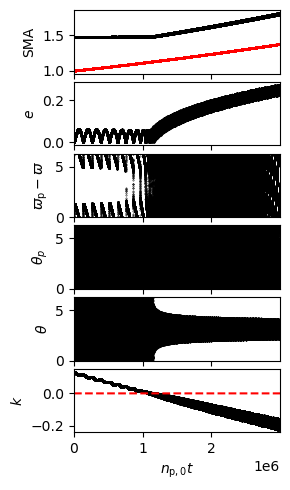

In [30]:
#fig, ax= plt.subplots(6,figsize=(5,7))
fig, ax= plt.subplots(6,figsize=(3,5))
plot(sol, job, fig, ax, "k", 0, sol.t[-2], 5e-5,params,T_DISK)
fig.tight_layout()
fig.subplots_adjust(hspace=0.13)
fig.savefig("paper 2 figures/capture.png",dpi=300)

[0, 0.03, 2e-05, 1e-05, 0, 0]
0.000990701233352906 1.1428827942045452 -0.1275017023907011 3.6666462079289985


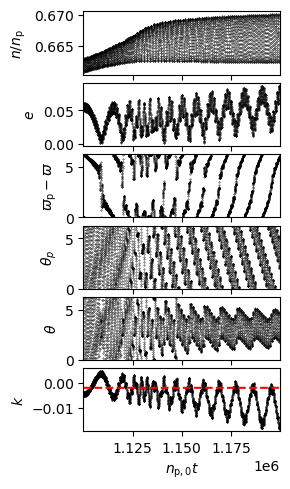

In [31]:
#fig, ax= plt.subplots(6,figsize=(5,7))
fig, ax= plt.subplots(6,figsize=(3,5))
plot(sol, job, fig, ax, "k", 1.1e6, 1.2e6, 5e-5,params,T_DISK,np_n=True)
fig.tight_layout()
fig.subplots_adjust(hspace=0.13)
fig.savefig("paper 2 figures/capture zoom.png",dpi=300)

# Figure 4

In [32]:
TMVAL = 2 * npy.pi * 1e6
T_DISK = TMVAL
convs = {}
convs = {ap: n ** Rational(2, 3) / np ** Rational(2, 3) * a, th: thp + omp * t - pom}
params = {}
params = {
    j: 2,
    mup: 5e-5,
    bp: 1.5455341716765871,
    b: 1.8956507412695471,
    b1_3_2: 12.08476062046314,
    b2_3_2: 10.485706741948807,
    omp: 2e-4,
    om:  1e-4,
    ep: 0.03,
    "thetap0": 0,
    "varpi0": 0,
}

alpha0val = (params[j] / (params[j] + 1)) ** (2.0 / 3)
# params[omp] = 0
# params[om] = params[omp] * alpha0val**3.5


funs = [
    iterfun.subs(convs).subs(params)
    for iterfun in [ndot, edot + edsec, pomdot + pomdsec, thpdot]
]

xp = [n, e, pom, thp, np, t]
funcl = lambdify(xp, funs)


def func(t, x0):
    if t < T_DISK:
        npval = npy.exp(-t / TMVAL)
    else:
        npval = npy.exp(-T_DISK / TMVAL)
    # npval = 1 - t / TMVAL
    return funcl(*x0, npval, t)

def event1(t, Y):
    if t < T_DISK:
        npval = npy.exp(-t / TMVAL)
    else:
        npval = npy.exp(-T_DISK / TMVAL)
    return Y[0] / npval - 0.8

event1.terminal = True

teval = npy.linspace(0, 3e6, 100000)
sol = sp.integrate.solve_ivp(
    func,
    [teval[0], teval[-1]],
    [1 / 1.8, 0.001, params["thetap0"], params["varpi0"]],
    t_eval=teval,
    rtol=1e-9,
    atol=1e-9,
    events = event1,
    method="DOP853",
)

job = [0, params[ep], params[omp], params[om], params["thetap0"], params["varpi0"]]

[0, 0.03, 0.0002, 0.0001, 0, 0]
0.05061746646143609 1.0772392199289453 2.0223973811837617 3.5417097827239914


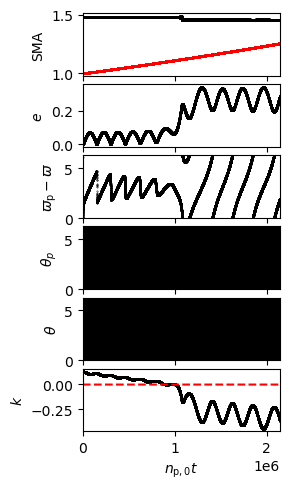

In [33]:
#fig, ax= plt.subplots(6,figsize=(5,7))
fig, ax= plt.subplots(6,figsize=(3,5))
plot(sol, job, fig, ax, "k", 0, sol.t[-2], 5e-5,params,T_DISK)
fig.tight_layout()
fig.subplots_adjust(hspace=0.13)
fig.savefig("paper 2 figures/disrupt.png",dpi=300)

[0, 0.03, 0.0002, 0.0001, 0, 0]
0.02548260320195185 1.138081103298483 0.11505219780611 2.498840972552756


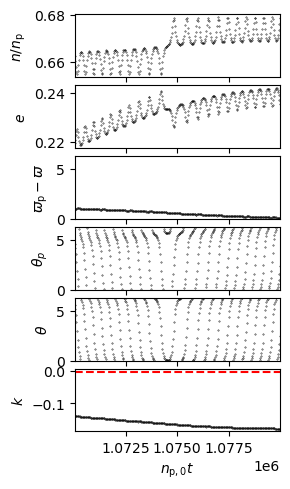

In [42]:
#fig, ax= plt.subplots(6,figsize=(5,7))
fig, ax= plt.subplots(6,figsize=(3,5))
plot(sol, job, fig, ax, "k", 1.07e6, 1.08e6, 5e-5,params,T_DISK,np_n=True)
fig.tight_layout()
fig.subplots_adjust(hspace=0.13)
fig.savefig("paper 2 figures/disrupt zoom.png",dpi=300)

# Figure 5

## $\mu_p=5\times10^{-5}$

In [66]:
mupint = 5e-5
mupstr = f"{mupint:0.0e}".replace('e-0', 'e-').replace('e+0', 'e')
muplatex = f"{mupint:0.0e}".replace('e-0', 'e-').replace('e+0', 'e').replace("e", r" \times 10^{") + "}"
print(mupstr)
print(muplatex)
TMVAL = 2*npy.pi*1e6
with open(f"results_mup5e-5_tm2pi1e6_n1.8_omalpha0val3.5_random10000.pkl","rb") as f:
    jobs, results = pickle.load(f)

5e-5
5 \times 10^{-5}


In [67]:
N_jobs = len(results)
eps = npy.zeros(N_jobs)
omps = npy.zeros(N_jobs)
oms = npy.zeros(N_jobs)
outcomes = npy.zeros(N_jobs)
orb_cross = npy.zeros(N_jobs)
X = npy.zeros((N_jobs,2))

for i in range(N_jobs):
    tint = results[i].t
    nint = results[i].y[0, :]
    npint = npy.exp(-results[i].t / TMVAL)
    apint = npint ** (-2.0 / 3)
    eint = results[i].y[1, :]
    epint = jobs[i][1]
    aint = nint ** (-2.0 / 3)
    #print(aint)
    #print(apint)
    #print(eint)
    #print(epint)
    #print(aint*(1-eint) < apint*(1+epint))
    eps[i] = jobs[i][1]
    omps[i] = jobs[i][2]
    oms[i] = jobs[i][3]
    X[i,0]= jobs[i][1]
    X[i,1]= npy.log10(jobs[i][2])
    if len(results[i].t_events[0]) > 0:
        outcomes[i] = 1
    if npy.any(npy.logical_and(aint*(1-eint) < apint*(1+epint), nint/npint<0.95*2/3)):
        orb_cross[i] = 1
print(npy.sum(outcomes))

7470.0


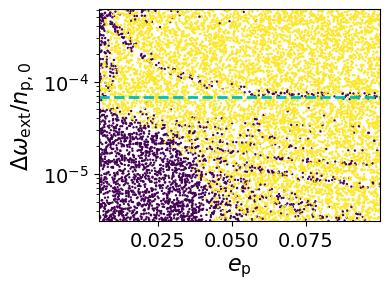

In [69]:
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(eps,omps-oms,c=outcomes,s=0.5)
ax.set_yscale("log")
ax.set_ylabel(r"$\Delta\omega_{\rm ext}/n_{\rm p,0}$",size=16)
ax.set_xlabel(r"$e_{\rm p}$",size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.axhline(y=DPOM_GPS,c="c",ls="--",lw=2,label="Giant planets on neptune")
ax.set_ylim((npy.min(omps-oms),npy.max(omps-oms)))
ax.set_xlim((npy.min(eps),npy.max(eps)))
plt.tight_layout()

#fig.savefig(f"paper 2 figures/{mupstr} Capture Full EoM.png",dpi=300,bbox_inches="tight")
#ax.legend()

## $\mu_p=10^{-4}$

In [115]:
mupint = 1e-4
mupstr = f"{mupint:0.0e}".replace('e-0', 'e-').replace('e+0', 'e')
muplatex = f"{mupint:0.0e}".replace('e-0', 'e-').replace('e+0', 'e').replace("e", r" \times 10^{") + "}"
print(mupstr)
print(muplatex)
TMVAL = 2*npy.pi*1e6
with open(f"results_mup1e-4_tm2pi1e6_n1.55_omalpha0val3.5_random10000.pkl","rb") as f:
    jobs, results = pickle.load(f)

1e-4
1 \times 10^{-4}


In [116]:
N_jobs = len(results)
eps = npy.zeros(N_jobs)
omps = npy.zeros(N_jobs)
oms = npy.zeros(N_jobs)
outcomes = npy.zeros(N_jobs)
orb_cross = npy.zeros(N_jobs)
X = npy.zeros((N_jobs,2))

for i in range(N_jobs):
    tint = results[i].t
    nint = results[i].y[0, :]
    npint = npy.exp(-results[i].t / TMVAL)
    apint = npint ** (-2.0 / 3)
    eint = results[i].y[1, :]
    epint = jobs[i][1]
    aint = nint ** (-2.0 / 3)
    #print(aint)
    #print(apint)
    #print(eint)
    #print(epint)
    #print(aint*(1-eint) < apint*(1+epint))
    eps[i] = jobs[i][1]
    omps[i] = jobs[i][2]
    oms[i] = jobs[i][3]
    X[i,0]= jobs[i][1]
    X[i,1]= npy.log10(jobs[i][2])
    if len(results[i].t_events[0]) > 0:
        outcomes[i] = 1
    if npy.any(npy.logical_and(aint*(1-eint) < apint*(1+epint), nint/npint<0.95*2/3)):
        orb_cross[i] = 1
print(npy.sum(outcomes))

5431.0


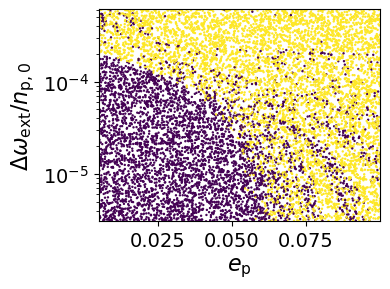

In [117]:
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(eps,omps-oms,c=outcomes,s=0.5)
ax.set_yscale("log")
ax.set_ylabel(r"$\Delta\omega_{\rm ext}/n_{\rm p,0}$",size=16)
ax.set_xlabel(r"$e_{\rm p}$",size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim((npy.min(omps-oms),npy.max(omps-oms)))
ax.set_xlim((npy.min(eps),npy.max(eps)))
plt.tight_layout()
fig.savefig(f"paper 2 figures/{mupstr} Capture Full EoM.png",dpi=300,bbox_inches="tight")
#ax.legend()

# Figure 6

## Resonant EoM

In [53]:
mupint = 5e-5
mupstr = f"{mupint:0.0e}".replace('e-0', 'e-').replace('e+0', 'e')
muplatex = f"{mupint:0.0e}".replace('e-0', 'e-').replace('e+0', 'e').replace("e", r" \times 10^{") + "}"
print(mupstr)
print(muplatex)
TMVAL = 2*npy.pi*1e6
with open(f"results_mup5e-5_tm2pi1e6_n1.55_omalpha0val3.5_random10000_nosec.pkl","rb") as f:
    jobs, results = pickle.load(f)

5e-5
5 \times 10^{-5}


In [54]:
N_jobs = len(results)
eps = npy.zeros(N_jobs)
omps = npy.zeros(N_jobs)
oms = npy.zeros(N_jobs)
outcomes = npy.zeros(N_jobs)
orb_cross = npy.zeros(N_jobs)
X = npy.zeros((N_jobs,2))

for i in range(N_jobs):
    tint = results[i].t
    nint = results[i].y[0, :]
    npint = npy.exp(-results[i].t / TMVAL)
    apint = npint ** (-2.0 / 3)
    eint = results[i].y[1, :]
    epint = jobs[i][1]
    aint = nint ** (-2.0 / 3)
    #print(aint)
    #print(apint)
    #print(eint)
    #print(epint)
    #print(aint*(1-eint) < apint*(1+epint))
    eps[i] = jobs[i][1]
    omps[i] = jobs[i][2]
    oms[i] = jobs[i][3]
    X[i,0]= jobs[i][1]
    X[i,1]= npy.log10(jobs[i][2])
    if len(results[i].t_events[0]) > 0:
        outcomes[i] = 1
    if npy.any(npy.logical_and(aint*(1-eint) < apint*(1+epint), nint/npint<0.95*2/3)):
        orb_cross[i] = 1
print(npy.sum(outcomes))

7697.0


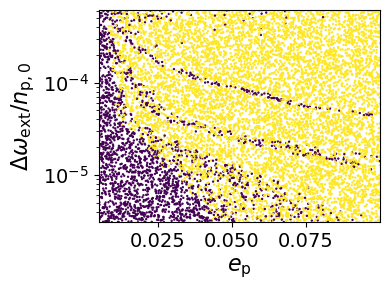

In [55]:
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(eps,omps-oms,c=outcomes,s=0.5)
ax.set_yscale("log")
ax.set_ylabel(r"$\Delta\omega_{\rm ext}/n_{\rm p,0}$",size=16)
ax.set_xlabel(r"$e_{\rm p}$",size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim((npy.min(omps-oms),npy.max(omps-oms)))
ax.set_xlim((npy.min(eps),npy.max(eps)))
plt.tight_layout()
fig.savefig(f"paper 2 figures/{mupstr} Capture Resonant EoM.png",dpi=300,bbox_inches="tight")
#ax.legend()

## Secular EoM

In [56]:
mupint = 5e-5
mupstr = f"{mupint:0.0e}".replace('e-0', 'e-').replace('e+0', 'e')
muplatex = f"{mupint:0.0e}".replace('e-0', 'e-').replace('e+0', 'e').replace("e", r" \times 10^{") + "}"
print(mupstr)
print(muplatex)
TMVAL = 2*npy.pi*1e6
with open(f"results_mup5e-5_tm2pi1e6_n1.55_omalpha0val3.5_random10000_nobp.pkl","rb") as f:
    jobs, results = pickle.load(f)

5e-5
5 \times 10^{-5}


In [57]:
N_jobs = len(results)
eps = npy.zeros(N_jobs)
omps = npy.zeros(N_jobs)
oms = npy.zeros(N_jobs)
outcomes = npy.zeros(N_jobs)
orb_cross = npy.zeros(N_jobs)
X = npy.zeros((N_jobs,2))

for i in range(N_jobs):
    tint = results[i].t
    nint = results[i].y[0, :]
    npint = npy.exp(-results[i].t / TMVAL)
    apint = npint ** (-2.0 / 3)
    eint = results[i].y[1, :]
    epint = jobs[i][1]
    aint = nint ** (-2.0 / 3)
    #print(aint)
    #print(apint)
    #print(eint)
    #print(epint)
    #print(aint*(1-eint) < apint*(1+epint))
    eps[i] = jobs[i][1]
    omps[i] = jobs[i][2]
    oms[i] = jobs[i][3]
    X[i,0]= jobs[i][1]
    X[i,1]= npy.log10(jobs[i][2])
    if len(results[i].t_events[0]) > 0:
        outcomes[i] = 1
    if npy.any(npy.logical_and(aint*(1-eint) < apint*(1+epint), nint/npint<0.95*2/3)):
        orb_cross[i] = 1
print(npy.sum(outcomes))

5735.0


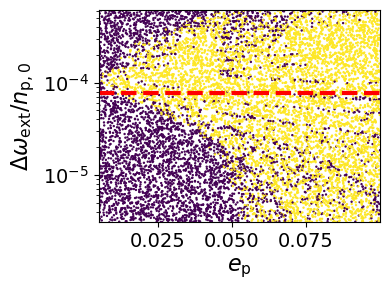

In [58]:
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(eps,omps-oms,c=outcomes,s=0.5)
ax.set_yscale("log")
ax.set_ylabel(r"$\Delta\omega_{\rm ext}/n_{\rm p,0}$",size=16)
ax.set_xlabel(r"$e_{\rm p}$",size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim((npy.min(omps-oms),npy.max(omps-oms)))
ax.set_xlim((npy.min(eps),npy.max(eps)))
plt.axhline(y=1.54*5e-5, c="r", ls="--", lw=3)
plt.tight_layout()
fig.savefig(f"paper 2 figures/{mupstr} Capture Secular EoM.png",dpi=300,bbox_inches="tight")
#ax.legend()

## Short Tm

In [70]:
mupint = 5e-5
mupstr = f"{mupint:0.0e}".replace('e-0', 'e-').replace('e+0', 'e')
muplatex = f"{mupint:0.0e}".replace('e-0', 'e-').replace('e+0', 'e').replace("e", r" \times 10^{") + "}"
print(mupstr)
print(muplatex)
TMVAL = 2*npy.pi*1e5
with open(f"results_mup5e-5_tm2pi1e5_n1.8_omalpha0val3.5_random10000.pkl","rb") as f:
    jobs, results = pickle.load(f)

5e-5
5 \times 10^{-5}


In [71]:
N_jobs = len(results)
eps = npy.zeros(N_jobs)
omps = npy.zeros(N_jobs)
oms = npy.zeros(N_jobs)
outcomes = npy.zeros(N_jobs)
orb_cross = npy.zeros(N_jobs)
X = npy.zeros((N_jobs,2))

for i in range(N_jobs):
    tint = results[i].t
    nint = results[i].y[0, :]
    npint = npy.exp(-results[i].t / TMVAL)
    apint = npint ** (-2.0 / 3)
    eint = results[i].y[1, :]
    epint = jobs[i][1]
    aint = nint ** (-2.0 / 3)
    #print(aint)
    #print(apint)
    #print(eint)
    #print(epint)
    #print(aint*(1-eint) < apint*(1+epint))
    eps[i] = jobs[i][1]
    omps[i] = jobs[i][2]
    oms[i] = jobs[i][3]
    X[i,0]= jobs[i][1]
    X[i,1]= npy.log10(jobs[i][2])
    if len(results[i].t_events[0]) > 0:
        outcomes[i] = 1
print(npy.sum(outcomes))

6797.0


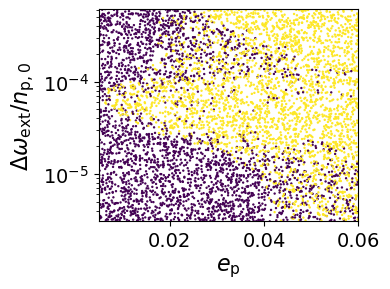

In [73]:
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(eps,omps-oms,c=outcomes,s=0.5)
ax.set_yscale("log")
ax.set_ylabel(r"$\Delta\omega_{\rm ext}/n_{\rm p,0}$",size=16)
ax.set_xlabel(r"$e_{\rm p}$",size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim((npy.min(omps-oms),npy.max(omps-oms)))
#ax.set_xlim((npy.min(eps),npy.max(eps)))
ax.set_xlim(npy.min(eps),0.06)
plt.tight_layout()
#fig.savefig(f"paper 2 figures/{mupstr} Capture Full EoM Fast Tm.png",dpi=300,bbox_inches="tight")
#ax.legend()

## Small $e_p$

In [59]:
mupint = 5e-5
mupstr = f"{mupint:0.0e}".replace('e-0', 'e-').replace('e+0', 'e')
muplatex = f"{mupint:0.0e}".replace('e-0', 'e-').replace('e+0', 'e').replace("e", r" \times 10^{") + "}"
print(mupstr)
print(muplatex)
TMVAL = 2*npy.pi*1e5
with open(f"results_mup5e-5_tm2pi1e6_n1.8_omalpha0val3.5_random10000_smallep.pkl","rb") as f:
    jobs, results = pickle.load(f)

5e-5
5 \times 10^{-5}


In [60]:
N_jobs = len(results)
eps = npy.zeros(N_jobs)
omps = npy.zeros(N_jobs)
oms = npy.zeros(N_jobs)
outcomes = npy.zeros(N_jobs)
orb_cross = npy.zeros(N_jobs)
X = npy.zeros((N_jobs,2))

for i in range(N_jobs):
    tint = results[i].t
    nint = results[i].y[0, :]
    npint = npy.exp(-results[i].t / TMVAL)
    apint = npint ** (-2.0 / 3)
    eint = results[i].y[1, :]
    epint = jobs[i][1]
    aint = nint ** (-2.0 / 3)
    #print(aint)
    #print(apint)
    #print(eint)
    #print(epint)
    #print(aint*(1-eint) < apint*(1+epint))
    eps[i] = jobs[i][1]
    omps[i] = jobs[i][2]
    oms[i] = jobs[i][3]
    X[i,0]= jobs[i][1]
    X[i,1]= npy.log10(jobs[i][2])
    if len(results[i].t_events[0]) > 0:
        outcomes[i] = 1
print(npy.sum(outcomes))

115.0


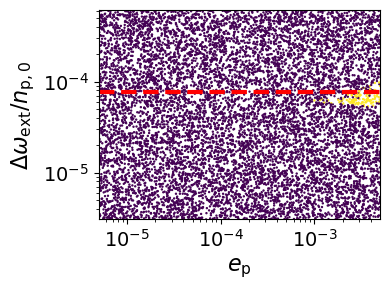

In [61]:
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(eps,omps-oms,c=outcomes,s=0.5)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\Delta\omega_{\rm ext}/n_{\rm p,0}$",size=16)
ax.set_xlabel(r"$e_{\rm p}$",size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim((npy.min(omps-oms),npy.max(omps-oms)))
ax.set_xlim((npy.min(eps),npy.max(eps)))
plt.axhline(y=1.54*5e-5, c="r", ls="--", lw=3)
plt.tight_layout()
fig.savefig(f"paper 2 figures/{mupstr} Capture Full EoM Small ep.png",dpi=300,bbox_inches="tight")
#ax.legend()